In [1]:
import cbpro 
from datetime import datetime, timedelta
import numpy as np 
import time
from tensortrade.oms.wallets import Wallet, Portfolio
from tensortrade.oms.instruments import USD, BTC, ETH, LTC
import tensortrade.env.default as default


In [2]:
public_client = cbpro.PublicClient()

In [3]:
public_client.get_products() 

[{'id': 'REP-BTC',
  'base_currency': 'REP',
  'quote_currency': 'BTC',
  'base_min_size': '0.1',
  'base_max_size': '5000',
  'quote_increment': '0.000001',
  'base_increment': '0.000001',
  'display_name': 'REP/BTC',
  'min_market_funds': '0.001',
  'max_market_funds': '6',
  'margin_enabled': False,
  'post_only': False,
  'limit_only': False,
  'cancel_only': False,
  'trading_disabled': False,
  'status': 'online',
  'status_message': ''},
 {'id': 'OGN-USD',
  'base_currency': 'OGN',
  'quote_currency': 'USD',
  'base_min_size': '0.1',
  'base_max_size': '130000',
  'quote_increment': '0.001',
  'base_increment': '0.01',
  'display_name': 'OGN/USD',
  'min_market_funds': '5',
  'max_market_funds': '100000',
  'margin_enabled': False,
  'post_only': False,
  'limit_only': False,
  'cancel_only': False,
  'trading_disabled': False,
  'status': 'online',
  'status_message': ''},
 {'id': '1INCH-GBP',
  'base_currency': '1INCH',
  'quote_currency': 'GBP',
  'base_min_size': '0.1',
  'b

In [3]:
data = public_client.get_product_historic_rates('ETH-USD', start = start_timestamp, granularity=900)

NameError: name 'start_timestamp' is not defined

In [4]:
now = datetime.now() 
delta = timedelta(days = 365)
start = now - delta
print(start)

2020-04-29 00:22:37.836309


In [5]:
def get_data_range(start, end, granularity, product):
    delta = timedelta(seconds=granularity)
    cur_time = start
    data = np.array([], dtype=np.float32).reshape(0,6)
    while cur_time < end:
        print(cur_time)
        cur_segment = public_client.get_product_historic_rates(product, start=cur_time, end=(cur_time + (delta * 300)), granularity=granularity)
        #print(len(cur_segment))
        cur_time = cur_time + (delta * len(cur_segment))
        #print(cur_time)
        cur_segment = np.flip(np.array(cur_segment), axis=0)
        #print(cur_segment.shape)
        data = np.concatenate((data, cur_segment), axis=0)
        print(data.shape)
        time.sleep(0.34)
    return data 


In [6]:
ETH_USD = get_data_range(start, now, 3600, 'ETH-USD')
print('done')
BTC_USD = get_data_range(start, now, 3600, 'BTC-USD')
print('done')
ETH_BTC = get_data_range(start, now, 3600, 'ETH-BTC')
print('done')

2020-04-29 00:22:37.836309
(300, 6)
2020-05-11 12:22:37.836309
(600, 6)
2020-05-24 00:22:37.836309
(900, 6)
2020-06-05 12:22:37.836309
(1200, 6)
2020-06-18 00:22:37.836309
(1500, 6)
2020-06-30 12:22:37.836309
(1800, 6)
2020-07-13 00:22:37.836309
(2100, 6)
2020-07-25 12:22:37.836309
(2400, 6)
2020-08-07 00:22:37.836309
(2700, 6)
2020-08-19 12:22:37.836309
(3000, 6)
2020-09-01 00:22:37.836309
(3299, 6)
2020-09-13 11:22:37.836309
(3599, 6)
2020-09-25 23:22:37.836309
(3899, 6)
2020-10-08 11:22:37.836309
(4198, 6)
2020-10-20 22:22:37.836309
(4498, 6)
2020-11-02 10:22:37.836309
(4798, 6)
2020-11-14 22:22:37.836309
(5098, 6)
2020-11-27 10:22:37.836309
(5398, 6)
2020-12-09 22:22:37.836309
(5698, 6)
2020-12-22 10:22:37.836309
(5998, 6)
2021-01-03 22:22:37.836309
(6298, 6)
2021-01-16 10:22:37.836309
(6598, 6)
2021-01-28 22:22:37.836309
(6898, 6)
2021-02-10 10:22:37.836309
(7198, 6)
2021-02-22 22:22:37.836309
(7498, 6)
2021-03-07 10:22:37.836309
(7798, 6)
2021-03-19 22:22:37.836309
(8098, 6)
2021

In [5]:
data = np.concatenate((ETH_USD, BTC_USD, ETH_BTC), axis = 1)

NameError: name 'ETH_USD' is not defined

In [7]:
print(np.diff(ETH_USD[299+2:301+2, 0]))
print(np.diff(ETH_USD[299:301, 0]))

print(np.all(np.diff(ETH_USD[:, 0]).astype(np.int32) == 900))


[900.]
[900.]
True


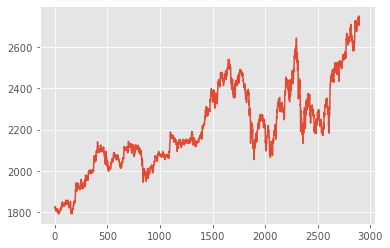

In [8]:

import matplotlib as plt 
plt.pyplot.plot(ETH_USD[:, 4])



In [117]:
np.save('crypto_data_15_min_4_20_to_4_27', data)

# TensorTrade

In [7]:
from tensortrade.feed.core import Stream, DataFeed, NameSpace
from tensortrade.oms.exchanges import Exchange
from tensortrade.oms.services.execution.simulated import execute_order


coinbase = Exchange("Coinbase", service=execute_order)(
    Stream.source(ETH_USD[:, 4] , dtype="float").rename("USD-ETH"),
    Stream.source(BTC_USD[:, 4], dtype="float").rename("USD-BTC"),
    #Stream.source(ETH_BTC[:, 4], dtype="float").rename("ETH-BTC")
)

In [8]:
# datafeed 


with NameSpace("coinbase"):
    coinbase_streams = [
        Stream.source(ETH_USD[:, 0] , dtype="float").rename("ETH:date"),
        Stream.source(ETH_USD[:, 1] , dtype="float").rename("ETH:open"),
        Stream.source(ETH_USD[:, 2] , dtype="float").rename("ETH:high"),
        Stream.source(ETH_USD[:, 3] , dtype="float").rename("ETH:low"),
        Stream.source(ETH_USD[:, 4] , dtype="float").rename("ETH:close"),
        Stream.source(ETH_USD[:, 5] , dtype="float").rename("ETH:volume"),
        
        Stream.source(BTC_USD[:, 0] , dtype="float").rename("BTC:date"),
        Stream.source(BTC_USD[:, 1] , dtype="float").rename("BTC:open"),
        Stream.source(BTC_USD[:, 2] , dtype="float").rename("BTC:high"),
        Stream.source(BTC_USD[:, 3] , dtype="float").rename("BTC:low"),
        Stream.source(BTC_USD[:, 4] , dtype="float").rename("BTC:close"),
        Stream.source(BTC_USD[:, 5] , dtype="float").rename("BTC:volume"),
        
        #Stream.source(ETH_BTC[:, 0] , dtype="float").rename("ETH_BTC:date"),
        #Stream.source(ETH_BTC[:, 1] , dtype="float").rename("ETH_BTC:open"),
        #Stream.source(ETH_BTC[:, 2] , dtype="float").rename("ETH_BTC:high"),
        #Stream.source(ETH_BTC[:, 3] , dtype="float").rename("ETH_BTC:low"),
        #Stream.source(ETH_BTC[:, 4] , dtype="float").rename("ETH_BTC:close"),
        #Stream.source(ETH_BTC[:, 5] , dtype="float").rename("ETH_BTC:volume"),

        #Stream.source(BTC_USD[:, 1:], dtype="float").rename("BTC-USD"),
        #Stream.source(ETH_BTC[:, 1:], dtype="float").rename("ETH-BTC")
    ]


feed = DataFeed(coinbase_streams)
feed.next()

{'coinbase:/ETH:date': 1588122000.0,
 'coinbase:/ETH:open': 196.71,
 'coinbase:/ETH:high': 197.92,
 'coinbase:/ETH:low': 196.94,
 'coinbase:/ETH:close': 197.74,
 'coinbase:/ETH:volume': 4771.56337483,
 'coinbase:/BTC:date': 1588122000.0,
 'coinbase:/BTC:open': 7744.0,
 'coinbase:/BTC:high': 7774.85,
 'coinbase:/BTC:low': 7746.41,
 'coinbase:/BTC:close': 7771.92,
 'coinbase:/BTC:volume': 454.35106654}

In [9]:

portfolio = Portfolio(USD, [
    Wallet(coinbase, 3000 * USD),
    Wallet(coinbase, 0.01 * BTC),
    Wallet(coinbase, 0.3 * ETH),
])
portfolio





In [15]:
renderer_feed = DataFeed([
    Stream.source(ETH_USD[:, 0] , dtype="float").rename("date"),
    Stream.source(ETH_USD[:, 1] , dtype="float").rename("open"),
    Stream.source(ETH_USD[:, 2] , dtype="float").rename("high"),
    Stream.source(ETH_USD[:, 3] , dtype="float").rename("low"),
    Stream.source(ETH_USD[:, 4] , dtype="float").rename("close"),
    Stream.source(ETH_USD[:, 5] , dtype="float").rename("volume"),
])


env = default.create(
    portfolio=portfolio,
    action_scheme="managed-risk",
    reward_scheme="risk-adjusted",
    feed=feed,
    renderer_feed=renderer_feed,
    renderer=default.renderers.PlotlyTradingChart(),
    window_size=20
)






# Training 

In [16]:
import tensorflow as tf 
from tensortrade.agents import DQNAgent, ParallelDQNAgent
print(env.observation_space.shape)
print(tf.config.list_physical_devices('GPU'))

policy_network = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=env.observation_space.shape),
            tf.keras.layers.Flatten(), 
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(512),
            tf.keras.layers.Activation('swish'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.4),
    
            tf.keras.layers.Dense(256),
            tf.keras.layers.Activation('swish'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.4),
    
            tf.keras.layers.Dense(128),
            tf.keras.layers.Activation('swish'),
            tf.keras.layers.BatchNormalization(),
    
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.Dense(64),
            tf.keras.layers.Activation('swish'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(env.action_space.n)
        ])

policy_network.summary()

(20, 12)
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 240)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 240)               960       
_________________________________________________________________
dense_10 (Dense)             (None, 512)               123392    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)    

In [ ]:
"""
        batch_size: int = kwargs.get('batch_size', 128)
        discount_factor: float = kwargs.get('discount_factor', 0.9999)
        learning_rate: float = kwargs.get('learning_rate', 0.0001)
        eps_start: float = kwargs.get('eps_start', 0.9)
        eps_end: float = kwargs.get('eps_end', 0.05)
        eps_decay_steps: int = kwargs.get('eps_decay_steps', 200)
        update_target_every: int = kwargs.get('update_target_every', 1000)
        memory_capacity: int = kwargs.get('memory_capacity', 1000)
        render_interval: int = kwargs.get('render_interval', 50)  # in steps, None for episode end renderers only
"""
agent = DQNAgent(env, policy_network)
print(agent)
agent.train(n_steps = 8000, n_episodes=30, save_path="agents/", update_target_every=25, memory_capacity=10000, eps_decay_steps=600, render_interval=2000)




















FigureWidget({
    'data': [{'close': array([ 197.74,  198.2 ,  198.45, ..., 1717.88, 1718.76, 1713.41]),
    …

FigureWidget({
    'data': [{'close': array([197.74, 198.2 , 198.45, ..., 241.87, 241.45, 241.82]),
          …

FigureWidget({
    'data': [{'close': array([197.74, 198.2 , 198.45, ..., 385.81, 386.91, 387.87]),
          …

FigureWidget({
    'data': [{'close': array([197.74, 198.2 , 198.45, ..., 980.44, 978.21, 968.17]),
          …